In [248]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pickle 

In [2]:
class Covid_Dataset(Dataset):
    def __init__(self, data, targets):
        super(Covid_Dataset, self)
        self.data = data
        self.targets = targets
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)

**Importing Data**

In [3]:
#load the original data and the new prepared data
df = pd.read_excel("../CSV/Data-FakeRealCOVID.xlsx")
newDF = pd.read_csv("../CSV/newDF.csv")

In [4]:
#drop a column that contains indexs (it is created automatically when saving a dataFrame to a csv file)
newDF = newDF.drop('Unnamed: 0',axis=1)

<AxesSubplot:>

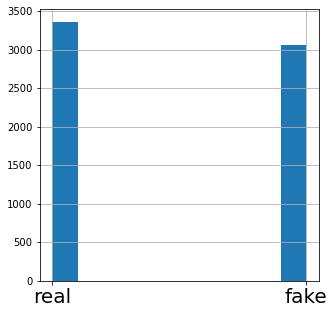

In [5]:
#pourcentage of fake and real news 
df.label.hist(xlabelsize=20,figsize=[5,5])

In [6]:
newDF

,aa,aadajoli,aai,aaj,aajtak,aamaadmiparti,aamctoday,aamir,aaradhya,ab,...,zombi,zone,zoo,zoodirector,zookeep,zoolog,zoom,zubymus,zydu,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.419268,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#we already defined this function on Vecotrization file
def redDim(dfVec,seuil1,seuil2):
    subDf = dfVec[dfVec != 0]
    map = subDf.count(axis = 0) <= seuil1 
    map2 = subDf.count(axis = 0) >= (dfVec.shape[0] - seuil2) 
    resultDf = dfVec.drop(dfVec.columns[map+map2],axis=1)
    columns_dropped=dfVec.columns[map+map2]
    
    return resultDf,columns_dropped

In [8]:
#creating a tensor containing targets(fake,real)
labels = []
for label in df.label.to_numpy():
  if label == 'real':
    labels.append(1)
  else:
    labels.append(0)
targets=torch.tensor(labels)
targets

tensor([1, 1, 0,  ..., 0, 0, 1])

In [9]:
targets.dtype

torch.int64

In [10]:
data=torch.tensor(newDF.to_numpy())


In [11]:
data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [12]:
# Importer la fonction de splitting des données de scikit learn
from sklearn.model_selection import train_test_split


In [13]:
# Créer 4 tensors en résultat du splitting: données d'apprentissage, données de test, labels d'apprentissage, et labels de test  
atrain_data, test_data, atrain_targets, test_targets = train_test_split(data, targets, test_size=0.2)
atrain_data.shape

torch.Size([5136, 9065])

In [14]:
# Créer 4 tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
train_data, validation_data, train_targets, validation_targets = train_test_split(atrain_data, atrain_targets, test_size=1000)
train_data.shape

torch.Size([4136, 9065])

In [15]:
# Afficher la taille de chaque tensor
print(train_data.shape, train_targets.shape)
print(validation_data.shape, validation_targets.shape)
print(test_data.shape,test_targets.shape)

torch.Size([4136, 9065]) torch.Size([4136])
torch.Size([1000, 9065]) torch.Size([1000])
torch.Size([1284, 9065]) torch.Size([1284])


In [16]:
# Importer Dataset de torch.utils.data
from torch.utils.data import Dataset

In [17]:
# Créer une classe qui hérite de Dataset et redéfinit les méthodes 
class Covid_Dataset(Dataset):
    def __init__(self, data, targets):
        super(Covid_Dataset, self)
        self.data = data
        self.targets = targets
    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]
    def __len__(self):
        return len(self.targets)


In [18]:
# Créer les 3 objets en instantiant votre classe
train_dataset = Covid_Dataset(train_data, train_targets)
test_dataset = Covid_Dataset(test_data, test_targets)
validation_dataset = Covid_Dataset(validation_data, validation_targets)

In [19]:
# Importer DataLoader de torch.utils.data
from torch.utils.data import DataLoader

In [20]:
# Créer une variable pour la taille du batch
batch_size = 64

In [21]:
# Créer les objets DataLoader pour vos datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

train_DL = DataLoader(train_dataset, batch_size=batch_size)
test_DL = DataLoader(test_dataset, batch_size=batch_size)
validation_DL = DataLoader(validation_dataset, batch_size=batch_size)


In [22]:
len(train_DL)

65

In [23]:
# Importer le module nn
import torch.nn as nn

In [24]:
train_data.shape[1]

9065

In [25]:
# En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
CovidNN = nn.Sequential(nn.Linear(train_data.shape[1], 64),nn.ReLU(),nn.Linear(64, 2))

In [26]:
# Définir la fonction du coût. On peut choisir CrossEntropyLoss
loss_function = nn.CrossEntropyLoss()

In [27]:
# Définir une fonction d'optimisation des coût: Adam par exemple. On devra définir un learning rate. On choisira 0.001.
import torch.optim as optim

optimizer = optim.Adam(CovidNN.parameters(), lr=0.0001)

In [28]:
#cette fonction permet de faire le training
def training(model,train_DL,validation_DL,nb_epochs,optimizer,loss_function):
    # Créer une boucle sur les epochs:
    for i in range(nb_epochs):
        # Spécifier qu'on est sur le mode entraînement
        model.train()
        # initialiser notre coût d'apprentissage à 0.0
        cout_appr = 0
        # Boucler sur les minibatchs des données d'entaînement (les données et leurs targets):
        for data,targets in train_DL:    
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
            output = model(data.float())
            # Calculer le coût en comparant les labels prédits aux targets du minibatch
            loss = loss_function(output,targets)
            # Backpropagation: 
            # Réinitialiser l'optimiseur
            optimizer.zero_grad()
            # Faire la backpropagation
            loss.backward()
            # Effectuer un pas d'optimisation
            optimizer.step()
            # Mettre à jour votre coût d'apprentissage en lui ajoutant le coût du data batch
            cout_appr += loss.item()
        # A la sortie de la boucle de l'entraînement, on calcule le coût moyen pour toutes les données training
        cout_moyen = cout_appr/len(train_DL.dataset)
        print('Train_Loss:',cout_moyen)
        # Initiliser le coût de validation à 0.0
        cout_valid = 0
        # Initialiser le nombre de prévisions correctes à 0
        prevision_correcte = 0
        # Spécifier qu'on est sur le mode d'évaluation
        model.eval()
        # Indiquer à Pytorch qu'on ne va pas faire de Gradient descent (comme on est dans l'évaluation)
        with torch.no_grad():
            # Boucler sur les minibatchs des données de validation (les données et leurs targets):
            for data,targets in validation_DL:  
                # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
                output = model(data.float())
                # Calculer le coût en comparant les labels prédits aux targets du minibatch
                loss = loss_function(output,targets)
                # Mettre à jour votre coût de validation en lui ajoutant le coût du data batch
                cout_valid += loss.item()
                # Mettre à jour le nombre de prévision correctes en y ajoutant le nombre des bonnes prévision sur ce batch
                # On y compare le label prédit avec le labels du minibatch. 
                # Penser à utiliser argmax pour avoir la prévision finale à partir du vecteur de prévision
                #prevision_correcte += len(output[output == targets])
                prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
            # A la sortie de cette boucle, calculer le coût moyen de validation
            cout_valid_moyenne = cout_valid/len(validation_DL.dataset)
            print('Valid_Loss:',cout_valid_moyenne)
            # Calculer la précision: la moyenne des prévisions correctes sur l'ensemble des observations dans le dataset validation 
            prevision_correcte_moyenne = prevision_correcte/len(validation_DL.dataset)
            print('Accuracy:',prevision_correcte_moyenne*100,'%\n')
            
        # Afficher pour chaque itération le coût d'entraînement, le coût de validation, et la précision.



In [31]:
#reinstialiser le model
for layer in CovidNN.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

In [32]:
#tester la fonction training avec un nombre d'epochs 9
training(CovidNN,train_DL,validation_DL,9,optimizer,loss_function)

Train_Loss: 0.01091643980554732
Valid_Loss: 0.010990489780902862
Accuracy: 49.8 %

Train_Loss: 0.010684486327249722
Valid_Loss: 0.010682378947734833
Accuracy: 76.8 %

Train_Loss: 0.01027294011999145
Valid_Loss: 0.010245365023612975
Accuracy: 89.5 %

Train_Loss: 0.009747811540874798
Valid_Loss: 0.009735360324382781
Accuracy: 91.10000000000001 %

Train_Loss: 0.009153237497898781
Valid_Loss: 0.009181139767169952
Accuracy: 91.4 %

Train_Loss: 0.008523816498612528
Valid_Loss: 0.008613723814487457
Accuracy: 91.60000000000001 %

Train_Loss: 0.007889681306579358
Valid_Loss: 0.008055426090955733
Accuracy: 91.7 %

Train_Loss: 0.007272684013532255
Valid_Loss: 0.007522849678993225
Accuracy: 91.7 %

Train_Loss: 0.006688509676857659
Valid_Loss: 0.007027397215366363
Accuracy: 91.8 %



In [33]:
#fonction qui permet de test le model
def testModel(model,test_DL,loss_function):
    # Initiliser le coût de test à 0.0
    cout_test = 0
    # Initialiser le nombre de prévisions correctes à 0
    prevision_correcte = 0
    with torch.no_grad():
        # Boucler sur les minibatchs des données de test (les données et leurs targets):
        for data,targets in test_DL:  
            # le vecteur des labels prédites par le modèle est le résultat de l'application du modèle sur le minibatch en cours. 
            output = model(data.float())
            # Calculer le coût en comparant les labels prédits aux targets du minibatch
            loss = loss_function(output,targets)
            # Mettre à jour votre coût de test en lui ajoutant le coût du data batch
            cout_test += loss.item()
            # Mettre à jour le nombre de prévision correctes en y ajoutant le nombre des bonnes prévision sur ce batch
            # On y compare le label prédit avec le labels du minibatch. 
            # Penser à utiliser argmax pour avoir la prévision finale à partir du vecteur de prévision
            #prevision_correcte += len(output[output == targets])
            prevision_correcte += torch.sum((torch.argmax(output, dim=1) == targets)).item()
        # A la sortie de cette boucle, calculer le coût moyen de test
        cout_test_moyenne = cout_test/len(test_DL.dataset)

        # Calculer la précision: la moyenne des prévisions correctes sur l'ensemble des observations dans le dataset test 
        prevision_correcte_moyenne = prevision_correcte/len(test_DL.dataset)
        print("Testing results :\nLoss : ",cout_test_moyenne,"\nAccuracy : ",prevision_correcte_moyenne*100,"%\n")
        
        return cout_test_moyenne,prevision_correcte_moyenne

In [34]:
testModel(CovidNN,test_DL,loss_function)

Testing results :
Loss :  0.007512089828278788 
Accuracy :  89.56386292834891 %



(0.007512089828278788, 0.8956386292834891)

In [66]:
#fonction qui permet de creer un model et faire le test avec differents hyperparametres en entré et retroune le model + les columns qui ont été supprimer
#du dataFrame avant d'entamer la phase d'apprentissage
def createModel(dataDF,targets,batch_size,neuronesNb,learning_rate,epochs,activationFunction,seuil1=0,seuil2=0):
    
    newDF,columnsToDrop = redDim(dataDF,seuil1,seuil2)
    data=torch.tensor(newDF.to_numpy())


    # Créer 4 tensors en résultat du splitting: données d'apprentissage, données de test, labels d'apprentissage, et labels de test  
    atrain_data, test_data, atrain_targets, test_targets = train_test_split(data, targets, test_size=0.3)

    # Créer 4 tensors en résultat du splitting: données d'apprentissage, données de validation, labels d'apprentissage, et labels de validation  
    train_data, validation_data, train_targets, validation_targets = train_test_split(atrain_data, atrain_targets, test_size=700)

    # Créer les 3 objets en instantiant votre classe
    train_dataset = Covid_Dataset(train_data, train_targets)
    test_dataset = Covid_Dataset(test_data, test_targets)
    validation_dataset = Covid_Dataset(validation_data, validation_targets)


    # Créer les objets DataLoader pour vos datasets d'apprentissage, test et validation en lui donner la taille du batch convenue

    train_DL = DataLoader(train_dataset, batch_size=batch_size)
    test_DL = DataLoader(test_dataset, batch_size=batch_size)
    validation_DL = DataLoader(validation_dataset, batch_size=batch_size)

    # En utilisant Sequential(), créer un modèle avec l'architecture susmentionnée
    CovidNN = nn.Sequential(nn.Linear(train_data.shape[1], neuronesNb),activationFunction,nn.Linear(neuronesNb, 2))
    
    #move model to cuda
    #CovidNN.cuda()
    # Définir la fonction du coût. On peut choisir CrossEntropyLoss
    loss_function = nn.CrossEntropyLoss()

    optimizer = optim.Adam(CovidNN.parameters(), lr=learning_rate)
    

    for layer in CovidNN.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

    training(CovidNN,train_DL,validation_DL,epochs,optimizer,loss_function)

    loss,accuracy = testModel(CovidNN,test_DL,loss_function)
    
    return CovidNN,columnsToDrop,loss,accuracy

**Let's make some models**

Le prototype de la fonction est le suivant :
```createModel(dataDF,targets,batch_size,neuronesNb,learning_rate,epochs,activationFunction,seuil1=0,seuil2=0)```

In [203]:
#Pour le learning rate lr = 0.0001
model1 = createModel(newDF,targets,64,64,0.0001,8,nn.ReLU())

Train_Loss: 0.010967445580910304
Valid_Loss: 0.010883181606020247
Accuracy: 44.57142857142857 %

Train_Loss: 0.010776439370390108
Valid_Loss: 0.010612174357686724
Accuracy: 63.857142857142854 %

Train_Loss: 0.010439056280605655
Valid_Loss: 0.010232124413762774
Accuracy: 84.28571428571429 %

Train_Loss: 0.009990298345834252
Valid_Loss: 0.009780841044017247
Accuracy: 88.85714285714286 %

Train_Loss: 0.009471486493921556
Valid_Loss: 0.009287793721471514
Accuracy: 90.71428571428571 %

Train_Loss: 0.008910505801172211
Valid_Loss: 0.008774340067590985
Accuracy: 91.28571428571428 %

Train_Loss: 0.008330139192582181
Valid_Loss: 0.008259796925953456
Accuracy: 91.42857142857143 %

Train_Loss: 0.007750681028531989
Valid_Loss: 0.007760056895869119
Accuracy: 91.42857142857143 %

Testing results :
Loss :  0.00810621417323872 
Accuracy :  89.92731048805815 %



Le model 1 est plus au moins bon

In [204]:
model2 = createModel(newDF,targets,64,64,0.0003,8,nn.ReLU())

Train_Loss: 0.010785934072956012
Valid_Loss: 0.010328278115817479
Accuracy: 84.14285714285714 %

Train_Loss: 0.009709479121327337
Valid_Loss: 0.00909774465220315
Accuracy: 90.42857142857143 %

Train_Loss: 0.008073646306174645
Valid_Loss: 0.007653374671936036
Accuracy: 90.57142857142857 %

Train_Loss: 0.006412433113747669
Valid_Loss: 0.006393137872219085
Accuracy: 90.85714285714286 %

Train_Loss: 0.005056143938144006
Valid_Loss: 0.005460210016795567
Accuracy: 90.85714285714286 %

Train_Loss: 0.004052250104542463
Valid_Loss: 0.004812441383089338
Accuracy: 91.0 %

Train_Loss: 0.003321837596536374
Valid_Loss: 0.004364733844995499
Accuracy: 91.57142857142857 %

Train_Loss: 0.002779282998680503
Valid_Loss: 0.004049745521375111
Accuracy: 92.14285714285714 %

Testing results :
Loss :  0.003959898439430373 
Accuracy :  91.58878504672897 %



In [205]:
#pour un lr = 0.0005
model3 = createModel(newDF,targets,64,64,0.0005,8,nn.ReLU())

Train_Loss: 0.010516754736948089
Valid_Loss: 0.009666163325309753
Accuracy: 84.71428571428572 %

Train_Loss: 0.008406974237783369
Valid_Loss: 0.00723417009626116
Accuracy: 92.14285714285714 %

Train_Loss: 0.005786157402165261
Valid_Loss: 0.005299603981631143
Accuracy: 92.42857142857143 %

Train_Loss: 0.0039709765006506765
Valid_Loss: 0.004249074139765331
Accuracy: 93.14285714285714 %

Train_Loss: 0.0028913530511766846
Valid_Loss: 0.0037014818404402052
Accuracy: 93.0 %

Train_Loss: 0.0022104247249800342
Valid_Loss: 0.0033994396456650325
Accuracy: 93.14285714285714 %

Train_Loss: 0.0017449702865271802
Valid_Loss: 0.0032247290653841837
Accuracy: 93.14285714285714 %

Train_Loss: 0.0014082785012395872
Valid_Loss: 0.0031227409413882665
Accuracy: 92.85714285714286 %

Testing results :
Loss :  0.0031858651743097346 
Accuracy :  92.5233644859813 %



On est tombé sur l'overfitting il faut diminuer le nombre d'epochs 

In [206]:
model4 = createModel(newDF,targets,64,64,0.0005,5,nn.ReLU())

Train_Loss: 0.010497487354856701
Valid_Loss: 0.0097938414982387
Accuracy: 67.57142857142857 %

Train_Loss: 0.00837560945362811
Valid_Loss: 0.007524925768375396
Accuracy: 88.28571428571429 %

Train_Loss: 0.0057639340994291455
Valid_Loss: 0.005719107048852103
Accuracy: 89.57142857142857 %

Train_Loss: 0.003956216327064466
Valid_Loss: 0.004727859646081924
Accuracy: 90.28571428571428 %

Train_Loss: 0.002882125707412935
Valid_Loss: 0.0042015449064118525
Accuracy: 90.42857142857143 %

Testing results :
Loss :  0.004027503595792864 
Accuracy :  91.74454828660437 %



In [207]:
model4_2 = createModel(newDF,targets,64,64,0.001,4,nn.ReLU())

Train_Loss: 0.009828901221768506
Valid_Loss: 0.007668731808662415
Accuracy: 92.14285714285714 %

Train_Loss: 0.005455136142030916
Valid_Loss: 0.004224628337791988
Accuracy: 92.42857142857143 %

Train_Loss: 0.0028274276332598833
Valid_Loss: 0.003107279645545142
Accuracy: 93.28571428571428 %

Train_Loss: 0.001745155123374182
Valid_Loss: 0.002687812564628465
Accuracy: 93.85714285714286 %

Testing results :
Loss :  0.003352198119227884 
Accuracy :  92.78296988577362 %



Un modèle mieux du premier model

In [208]:
#tester avec seuil 1
model5 = createModel(newDF,targets,64,64,0.001,4,nn.ReLU(),seuil1=1,seuil2=1)

Train_Loss: 0.00980691469589157
Valid_Loss: 0.007838329119341713
Accuracy: 89.0 %

Train_Loss: 0.005624869519242752
Valid_Loss: 0.004671305077416556
Accuracy: 89.0 %

Train_Loss: 0.003094330818859225
Valid_Loss: 0.0036340646871498654
Accuracy: 90.57142857142857 %

Train_Loss: 0.002045567815609838
Valid_Loss: 0.0032436626510960716
Accuracy: 91.57142857142857 %

Testing results :
Loss :  0.00305951849159979 
Accuracy :  93.04257528556595 %



Le model precedent est mieu de ceci

In [209]:
#on ajoute des seuils pour diminuer le nombre de features
model6 = createModel(newDF,targets,64,64,0.001,4,nn.ReLU(),seuil1=2,seuil2=2)

Train_Loss: 0.00999860359482471
Valid_Loss: 0.008314544303076607
Accuracy: 87.28571428571429 %

Train_Loss: 0.005924440284088278
Valid_Loss: 0.0049507341640336175
Accuracy: 90.0 %

Train_Loss: 0.003312550701149904
Valid_Loss: 0.0038105356054646627
Accuracy: 90.57142857142857 %

Train_Loss: 0.0022284222200206535
Valid_Loss: 0.003411377604518618
Accuracy: 90.71428571428571 %

Testing results :
Loss :  0.0031782921968436066 
Accuracy :  92.1079958463136 %



In [210]:
#augmenter les seuils
model7 = createModel(newDF,targets,64,64,0.001,4,nn.ReLU(),seuil1=5,seuil2=5)

Train_Loss: 0.009866667056184225
Valid_Loss: 0.007875155934265682
Accuracy: 91.14285714285715 %

Train_Loss: 0.005888953259039001
Valid_Loss: 0.004670231470039913
Accuracy: 91.0 %

Train_Loss: 0.003541246959895414
Valid_Loss: 0.0036589468376977104
Accuracy: 91.28571428571428 %

Train_Loss: 0.002579585487552235
Valid_Loss: 0.0033083916774817876
Accuracy: 92.42857142857143 %

Testing results :
Loss :  0.003324758978067343 
Accuracy :  91.74454828660437 %



On peut conclure que c'est mieux de ne pas inclure les seuils

In [229]:
#augmenter le batch size
model8 = createModel(newDF,targets,128,128,0.001,4,nn.ReLU(),seuil1=1,seuil2=1)

Train_Loss: 0.005093567501449183
Valid_Loss: 0.0048268427167619974
Accuracy: 87.71428571428571 %

Train_Loss: 0.0034439740648505935
Valid_Loss: 0.0031599090780530656
Accuracy: 89.14285714285714 %

Train_Loss: 0.0019417563723336411
Valid_Loss: 0.002330020900283541
Accuracy: 89.42857142857143 %

Train_Loss: 0.00122196484959999
Valid_Loss: 0.002037140407732555
Accuracy: 90.28571428571428 %

Testing results :
Loss :  0.001788954195389495 
Accuracy :  92.57528556593977 %



In [230]:
#augmenter le batch size plus
model9 = createModel(newDF,targets,256,256,0.001,4,nn.ReLU(),seuil1=1,seuil2=1)

Train_Loss: 0.0026284486573812014
Valid_Loss: 0.0026300292355673654
Accuracy: 79.14285714285715 %

Train_Loss: 0.0021160493870440067
Valid_Loss: 0.001997732605252947
Accuracy: 88.57142857142857 %

Train_Loss: 0.001424080425648546
Valid_Loss: 0.0014165828483445305
Accuracy: 90.57142857142857 %

Train_Loss: 0.0009009743410785636
Valid_Loss: 0.001086778278861727
Accuracy: 90.71428571428571 %

Testing results :
Loss :  0.0010049000599055028 
Accuracy :  91.79646936656283 %



In [164]:
#Pour le learning rate lr = 0.0001
model10 = createModel(newDF,targets,64,64,0.0001,8,nn.Sigmoid())

Train_Loss: 0.011023066973271468
Valid_Loss: 0.010832649724824088
Accuracy: 52.42857142857142 %

Train_Loss: 0.010866331234063735
Valid_Loss: 0.010758639659200396
Accuracy: 52.42857142857142 %

Train_Loss: 0.01079126661491193
Valid_Loss: 0.010699083123888288
Accuracy: 52.42857142857142 %

Train_Loss: 0.010722575011100025
Valid_Loss: 0.010639277526310512
Accuracy: 52.42857142857142 %

Train_Loss: 0.010653544348921346
Valid_Loss: 0.010578550355775016
Accuracy: 52.85714285714286 %

Train_Loss: 0.010583197577224635
Valid_Loss: 0.01051643865449088
Accuracy: 55.285714285714285 %

Train_Loss: 0.010510951343434827
Valid_Loss: 0.010452483807291304
Accuracy: 60.0 %

Train_Loss: 0.01043629641588198
Valid_Loss: 0.010386256149836948
Accuracy: 66.28571428571428 %

Testing results :
Loss :  0.010646163612635089 
Accuracy :  63.2398753894081 %



Le model 1 est plus au moins bon

In [165]:
model11 = createModel(newDF,targets,64,64,0.0003,8,nn.Sigmoid())

Train_Loss: 0.010915802146613002
Valid_Loss: 0.010718232137816293
Accuracy: 56.99999999999999 %

Train_Loss: 0.010683304677841596
Valid_Loss: 0.010548514127731324
Accuracy: 69.85714285714286 %

Train_Loss: 0.010474779697613271
Valid_Loss: 0.010371654544557844
Accuracy: 83.71428571428572 %

Train_Loss: 0.010245540202386641
Valid_Loss: 0.01017250256878989
Accuracy: 89.14285714285714 %

Train_Loss: 0.009984793698215836
Valid_Loss: 0.009943412116595676
Accuracy: 89.85714285714286 %

Train_Loss: 0.00968450353405761
Valid_Loss: 0.009678817050797598
Accuracy: 90.28571428571428 %

Train_Loss: 0.009339896986593871
Valid_Loss: 0.009376359496797835
Accuracy: 90.0 %

Train_Loss: 0.008950739784748477
Valid_Loss: 0.009037735547338213
Accuracy: 90.14285714285715 %

Testing results :
Loss :  0.009201372957180098 
Accuracy :  90.2907580477674 %



In [166]:
#pour un lr = 0.0005
model12 = createModel(newDF,targets,64,64,0.0005,8,nn.Sigmoid())

Train_Loss: 0.010842776779256246
Valid_Loss: 0.010626199926648821
Accuracy: 52.85714285714286 %

Train_Loss: 0.010558932438359238
Valid_Loss: 0.010352012770516532
Accuracy: 56.99999999999999 %

Train_Loss: 0.01021991117916801
Valid_Loss: 0.009996294719832283
Accuracy: 73.14285714285714 %

Train_Loss: 0.00976691784265485
Valid_Loss: 0.009520629644393921
Accuracy: 86.14285714285714 %

Train_Loss: 0.009168382421819297
Valid_Loss: 0.008915234208106994
Accuracy: 90.42857142857143 %

Train_Loss: 0.008432338653455362
Valid_Loss: 0.008213649945599692
Accuracy: 91.42857142857143 %

Train_Loss: 0.007611876853403444
Valid_Loss: 0.007481383255549839
Accuracy: 90.28571428571428 %

Train_Loss: 0.006782330953578416
Valid_Loss: 0.006784783644335611
Accuracy: 90.85714285714286 %

Testing results :
Loss :  0.007072509124271595 
Accuracy :  90.96573208722741 %



On est tombé sur l'overfitting il faut diminuer le nombre d'epochs 

In [167]:
model13 = createModel(newDF,targets,64,64,0.0005,5,nn.Sigmoid())

Train_Loss: 0.010880856794876114
Valid_Loss: 0.010593617728778294
Accuracy: 56.99999999999999 %

Train_Loss: 0.010596210163520648
Valid_Loss: 0.010339279089655195
Accuracy: 59.42857142857143 %

Train_Loss: 0.010261078853637341
Valid_Loss: 0.010005729453904289
Accuracy: 76.85714285714286 %

Train_Loss: 0.009797021220342449
Valid_Loss: 0.009545646480151585
Accuracy: 86.85714285714286 %

Train_Loss: 0.009172323806447988
Valid_Loss: 0.008950068695204599
Accuracy: 89.14285714285714 %

Testing results :
Loss :  0.009140161524680545 
Accuracy :  88.94080996884736 %



Un modèle mieux du premier model

In [168]:
#tester avec seuil 1
model14 = createModel(newDF,targets,64,64,0.001,4,nn.Sigmoid(),seuil1=1,seuil2=1)

Train_Loss: 0.010793614227267774
Valid_Loss: 0.010465908476284572
Accuracy: 57.99999999999999 %

Train_Loss: 0.010201479628894224
Valid_Loss: 0.00980945084776197
Accuracy: 86.0 %

Train_Loss: 0.009174300390101761
Valid_Loss: 0.008667353476796832
Accuracy: 88.85714285714286 %

Train_Loss: 0.007657712353928566
Valid_Loss: 0.007269129753112793
Accuracy: 88.14285714285714 %

Testing results :
Loss :  0.007368023738435248 
Accuracy :  89.66770508826583 %



Le model precedent est mieu de ceci

In [169]:
#on ajoute des seuils pour diminuer le nombre de features
model15 = createModel(newDF,targets,64,64,0.001,4,nn.Sigmoid(),seuil1=2,seuil2=2)

Train_Loss: 0.010828621760128545
Valid_Loss: 0.010360557862690517
Accuracy: 59.71428571428572 %

Train_Loss: 0.010197564967381181
Valid_Loss: 0.009708308151790074
Accuracy: 85.71428571428571 %

Train_Loss: 0.009340574223554065
Valid_Loss: 0.008666567036083766
Accuracy: 91.71428571428571 %

Train_Loss: 0.008084981950195325
Valid_Loss: 0.0073388204404285975
Accuracy: 91.71428571428571 %

Testing results :
Loss :  0.007664392082366864 
Accuracy :  90.7061266874351 %



In [170]:
#augmenter les seuils
model16 = createModel(newDF,targets,64,64,0.001,4,nn.Sigmoid(),seuil1=5,seuil2=5)

Train_Loss: 0.010860347345620629
Valid_Loss: 0.010426934787205288
Accuracy: 89.28571428571429 %

Train_Loss: 0.010208386918024195
Valid_Loss: 0.009766039422580175
Accuracy: 88.85714285714286 %

Train_Loss: 0.009347403904105968
Valid_Loss: 0.00870754224913461
Accuracy: 89.0 %

Train_Loss: 0.008089555986127416
Valid_Loss: 0.007376293540000915
Accuracy: 89.28571428571429 %

Testing results :
Loss :  0.007718233629550518 
Accuracy :  88.5773624091381 %



On peut conclure que c'est mieux de ne pas inclure les seuils

In [226]:
#augmenter le batch size
model17 = createModel(newDF,targets,128,128,0.001,4,nn.Sigmoid(),seuil1=1,seuil2=1)

Train_Loss: 0.005384472007806765
Valid_Loss: 0.005677004797118051
Accuracy: 54.85714285714286 %

Train_Loss: 0.005096474759630235
Valid_Loss: 0.005378427164895194
Accuracy: 90.14285714285715 %

Train_Loss: 0.004717737263481932
Valid_Loss: 0.004933067985943385
Accuracy: 90.28571428571428 %

Train_Loss: 0.004178533459187308
Valid_Loss: 0.0043445298501423426
Accuracy: 89.85714285714286 %

Testing results :
Loss :  0.004237245315703276 
Accuracy :  89.82346832814122 %



In [227]:
#augmenter le batch size plus
model18 = createModel(newDF,targets,256,256,0.001,4,nn.Sigmoid(),seuil1=1,seuil2=1)

Train_Loss: 0.0027221757201816637
Valid_Loss: 0.002995188236236572
Accuracy: 49.857142857142854 %

Train_Loss: 0.0026331235216238277
Valid_Loss: 0.002835767354284014
Accuracy: 49.857142857142854 %

Train_Loss: 0.0025272256113946217
Valid_Loss: 0.0026889318227767945
Accuracy: 82.85714285714286 %

Train_Loss: 0.0023901379133565337
Valid_Loss: 0.0025697905676705496
Accuracy: 84.71428571428572 %

Testing results :
Loss :  0.0024709203285344047 
Accuracy :  83.85254413291796 %



ReLU marche mieux que sigmoid

**Classifie models we created into groups to make charts**

In [231]:
reluModels = [model1,model2,model3,model4,model5,model6,model7,model8,model9]

In [232]:
sigmoidModels = [model10,model11,model12,model13,model14,model15,model16,model17,model18]

In [233]:
thresholdsModels = [model4,model5,model6,model7]

In [234]:
batchSize_HiddenNN = [model4,model8,model9]

In [235]:
lrModels = [model1,model2,model4,model4_2]

**Make Charts**

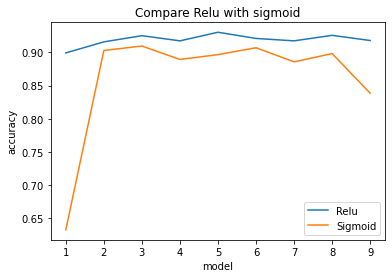

In [244]:
# Dataset
x = []
y = []
for i in range(len(reluModels)):
    x.append(i+1)
    y.append(reluModels[i][3])
plt.plot(x, y,label="Relu")

x2 = []
y2 = []
for i in range(len(sigmoidModels)):
    x2.append(i+1)
    y2.append(sigmoidModels[i][3])
plt.plot(x2, y2,label="Sigmoid")

plt.title("Compare Relu with sigmoid")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.legend()
plt.show()


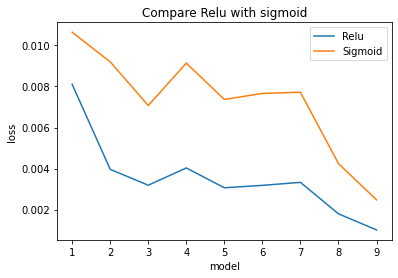

In [245]:
# Dataset
x = []
y = []
for i in range(len(reluModels)):
    x.append(i+1)
    y.append(reluModels[i][2])
plt.plot(x, y,label="Relu")

x2 = []
y2 = []
for i in range(len(sigmoidModels)):
    x2.append(i+1)
    y2.append(sigmoidModels[i][2])
plt.plot(x2, y2,label="Sigmoid")

plt.title("Compare Relu with sigmoid")
plt.xlabel("model")
plt.ylabel("loss")
plt.legend()
plt.show()


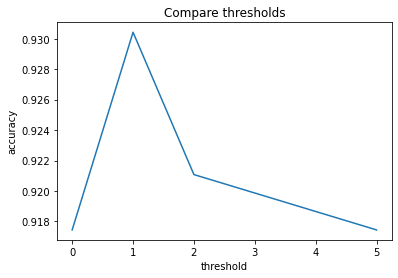

In [238]:
# Dataset
x = [0,1,2,5]
y = []
for model in thresholdsModels:
    y.append(model[3])
plt.plot(x, y,label="Relu")


plt.title("Compare thresholds")
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.show()

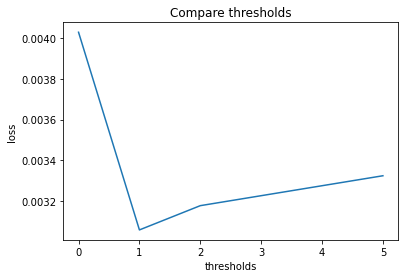

In [239]:
# Dataset
x = [0,1,2,5]
y = []
for model in thresholdsModels:
    y.append(model[2])
plt.plot(x, y,label="Relu")


plt.title("Compare thresholds")
plt.xlabel("thresholds")
plt.ylabel("loss")
plt.show()

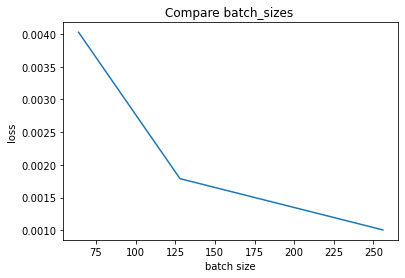

In [240]:
# Dataset
x = [64,128,256]
y = []
for model in batchSize_HiddenNN:
    y.append(model[2])
plt.plot(x, y,label="Relu")


plt.title("Compare batch_sizes ")
plt.xlabel("batch size")
plt.ylabel("loss")
plt.show()

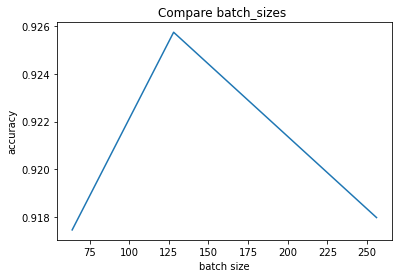

In [241]:
# Dataset
x = [64,128,256]
y = []
for model in batchSize_HiddenNN:
    y.append(model[3])
plt.plot(x, y,label="Relu")


plt.title("Compare batch_sizes ")
plt.xlabel("batch size")
plt.ylabel("accuracy")
plt.show()

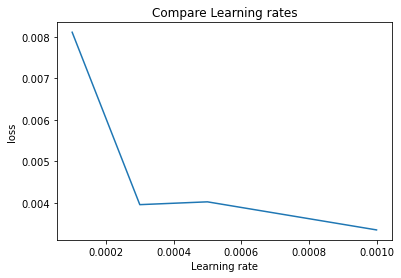

In [242]:
# Dataset
x = [0.0001,0.0003,0.0005,0.001]
y = []
for model in lrModels:
    y.append(model[2])
plt.plot(x, y,label="Relu")


plt.title("Compare Learning rates")
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.show()

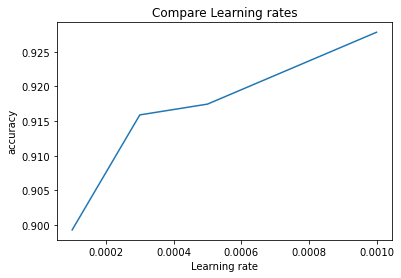

In [243]:
# Dataset
x = [0.0001,0.0003,0.0005,0.001]
y = []
for model in lrModels:
    y.append(model[3])
plt.plot(x, y,label="Relu")


plt.title("Compare Learning rates")
plt.xlabel("Learning rate")
plt.ylabel("accuracy")
plt.show()

**Sauvegarder tous les modèles sous fichier pkl**

In [247]:
globals()['model1']

(Sequential(
   (0): Linear(in_features=9065, out_features=64, bias=True)
   (1): ReLU()
   (2): Linear(in_features=64, out_features=2, bias=True)
 ),
 Index([], dtype='object'),
 0.00810621417323872,
 0.8992731048805815)

In [258]:
for i in range(1,19):
    i = str(i)
    torch.save(globals()['model'+i][0],"../models/model"+i+"/model"+i+".pkl")
    pickle.dump(globals()['model'+i][1], open("../models/model"+i+"/columns"+i+".pkl", "wb"))

In [252]:
i = 1
"../models/model"+str(i)+"/model"+str(i)+".pkl"

'../models/model1/model1.pkl'